In [1]:
%matplotlib inline
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
인구 = pd.read_csv('인구.csv',encoding='CP949')
인구밀도 = pd.read_csv('인구밀도.csv',encoding='CP949')
GDP = pd.read_csv('GDP.csv',encoding='CP949')
출산율 = pd.read_csv('출산율.csv',encoding='CP949')
정부지출 = pd.read_csv('정부지출.csv',encoding='CP949')
사망률 = pd.read_csv('사망률.csv',encoding='CP949')
맥도날드 = pd.read_csv("McDonald's.csv",encoding='CP949')
스타벅스 = pd.read_csv('starbucks.csv',encoding='CP949')
미국면적 = pd.read_csv('미국 면적.csv',encoding='CP949')
미국인구 = pd.read_csv('미국 인구.csv',encoding='CP949')
미국집값 = pd.read_csv('미국 집값.csv',encoding='CP949')
미국GDP = pd.read_csv('미국GDP.csv',encoding='CP949')
미국PCPI = pd.read_csv('미국PCPI.csv',encoding='CP949')
미국집값=미국집값.set_index('state')
미국GDP=미국GDP.set_index('state')
미국PCPI=미국PCPI.set_index('state')
스타벅스=스타벅스.set_index('state')
맥도날드=맥도날드.set_index('state')
미국면적=미국면적.set_index('state')
미국인구=미국인구.set_index('state')
인구=인구.set_index('Country Name')
인구밀도=인구밀도.set_index('Country Name')#한 사람당 면적
GDP=GDP.set_index('Country Name')#millon
사망률=사망률.set_index('Country Name')#1000명당
정부지출=정부지출.set_index('Country Name')#millon
출산율=출산율.set_index('Country Name')#1000명당
인구=인구.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
인구밀도=인구밀도.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
GDP=GDP.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
사망률=사망률.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
정부지출=정부지출.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
출산율=출산율.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)

미국집값상승률1=미국집값[미국집값['period']=='2020-Q4']
미국집값상승률2=미국집값[미국집값['period']=='2018-Q4']
미국집값상승률=pd.DataFrame(미국집값상승률1['index_sa']-미국집값상승률2['index_sa'])
print(미국집값상승률)
미국데이터= pd.concat([(미국인구['population']),(미국면적['km2']),(미국집값상승률['index_sa']),미국PCPI['2018'],미국GDP['2018-Q1']],axis=1)
미국데이터['인구밀도']=미국데이터['population']/미국데이터['km2']

                index_sa
state                   
Alaska             30.18
Alabama            30.01
Arkansas           29.14
Arizona            68.00
California         40.55
Colorado           71.77
Connecticut        29.57
D.C                76.05
Delaware           28.51
Florida            45.15
Georgia            37.59
Hawaii             39.52
Iowa               28.75
Idaho             121.91
Illinois           18.22
Indiana            41.78
Kansas             40.83
Kentucky           35.85
Louisiana          24.13
Massachusetts      55.90
Maryland           26.12
Maine              54.85
Michigan           39.93
Minnesota          42.73
Missouri           40.76
Mississippi        24.58
Montana            81.90
North Carolina     36.77
North Dakota       33.60
Nebraska           44.13
New Hampshire      52.33
New Jersey         37.37
New Mexico         41.71
Nevada             32.22
New York           38.55
Ohio               36.55
Oklahoma           33.30
Oregon             73.22


In [3]:
plt.rcParams["figure.figsize"] = (10,10)


In [4]:
(정부지출['2018']*1000000/인구['2018']).dropna().sort_values()


Country Name
World                     0.002244
IDA & IBRD total          0.002373
Low & middle income       0.002387
Middle income             0.002670
IBRD only                 0.003247
                          ...     
Faroe Islands           594.627771
Kiribati                637.706945
Greenland               787.715641
Marshall Islands        964.645747
Palau                  1850.792581
Name: 2018, Length: 211, dtype: float64

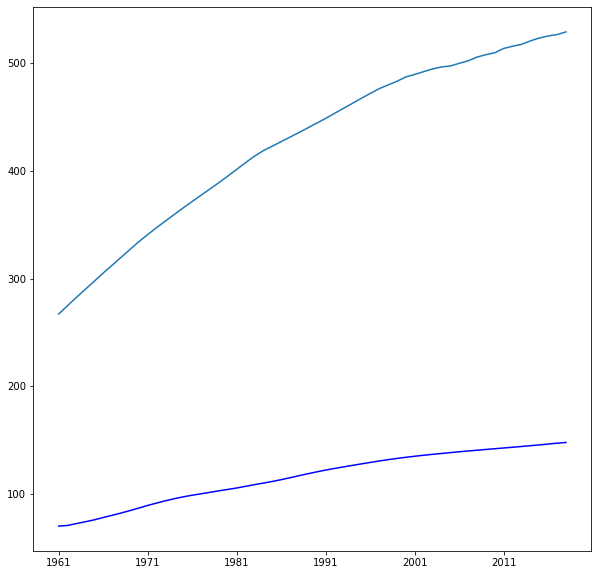

In [5]:
#출산율.loc['Korea, Rep.'].dropna().astype(float).plot()
#사망률.loc['Korea, Rep.'].dropna().astype(float).plot()
(인구밀도.loc['Korea, Rep.']).dropna().astype(float).plot()
(인구밀도.loc['China']).dropna().astype(float).plot(color='b')

In [6]:
인구=인구.loc[['Slovenia','Lithuania','Russian Federation','Romania','Argentina','Estonia','Latvia','Slovak Republic','Finland','Hungary','Mexico','Czech Republic','Bulgaria','Turkey','Germany','Austria','Brazil','Netherlands','Chile','Switzerland','Denmark','United Kingdom','Italy','South Africa','Sweden','Japan','Spain','Belgium','United States','Canada','Portugal','Israel','France','Poland','Colombia','Norway','China','New Zealand','Greece','India','Indonesia','Ireland','Australia','Korea, Rep.']]
GDP=GDP.loc[['Slovenia','Lithuania','Russian Federation','Romania','Argentina','Estonia','Latvia','Slovak Republic','Finland','Hungary','Mexico','Czech Republic','Bulgaria','Turkey','Germany','Austria','Brazil','Netherlands','Chile','Switzerland','Denmark','United Kingdom','Italy','South Africa','Sweden','Japan','Spain','Belgium','United States','Canada','Portugal','Israel','France','Poland','Colombia','Norway','China','New Zealand','Greece','India','Indonesia','Ireland','Australia','Korea, Rep.']]
인구['2018']

Country Name
Slovenia              2.073894e+06
Lithuania             2.801543e+06
Russian Federation    1.444779e+08
Romania               1.947254e+07
Argentina             4.449450e+07
Estonia               1.321977e+06
Latvia                1.927174e+06
Slovak Republic       5.446771e+06
Finland               5.515525e+06
Hungary               9.775564e+06
Mexico                1.261908e+08
Czech Republic        1.062993e+07
Bulgaria              7.025037e+06
Turkey                8.231972e+07
Germany               8.290578e+07
Austria               8.840521e+06
Brazil                2.094693e+08
Netherlands           1.723162e+07
Chile                 1.872916e+07
Switzerland           8.514329e+06
Denmark               5.793636e+06
United Kingdom        6.646034e+07
Italy                 6.042176e+07
South Africa          5.777962e+07
Sweden                1.017521e+07
Japan                 1.265291e+08
Spain                 4.679775e+07
Belgium               1.142705e+07
United 

In [7]:
data = pd.concat([np.log(인구['2017']),np.log(GDP['2018'])],axis=1)
data=data.loc[['Argentina','Australia','Austria','Belgium','Brazil','Bulgaria','Canada','Chile','China','Colombia','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','India','Indonesia','Ireland','Israel','Italy','Japan','Korea, Rep.','Latvia','Lithuania','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Romania','Russian Federation','Slovak Republic','Slovenia','South Africa','Spain','Sweden','Switzerland','Turkey','United Kingdom','United States']]
data

,2017,2018
Country Name,,
Argentina,17.600718,26.972521
Australia,17.018333,27.990708
Austria,15.989986,26.843772
Belgium,16.246942,27.021726
Brazil,19.152249,28.265204
Bulgaria,15.772212,24.916402
Canada,17.414009,28.171169
Chile,16.731682,26.421225
China,21.049973,30.262536


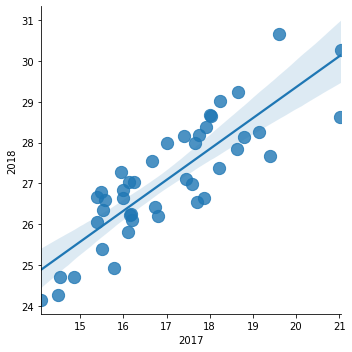

In [8]:
sns.lmplot('2017','2018',data=data,fit_reg=True,scatter_kws={"s":150})

미국 데이터

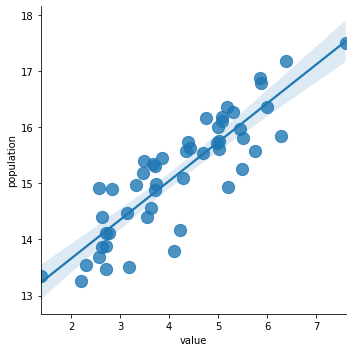

In [9]:
data = pd.concat([np.log(스타벅스['value']),np.log(미국인구['population'])],axis=1)
sns.lmplot("value",'population',data=data,fit_reg=True,scatter_kws={"s":150})

In [10]:
미국집값상승률=미국집값[미국집값['period']=='2018-Q4']
미국집값상승률=pd.DataFrame(미국집값상승률['index_sa'])
미국집값상승률

,index_sa
state,
Alaska,263.60
Alabama,183.47
Arkansas,215.48
Arizona,301.30
California,274.97
Colorado,435.59
Connecticut,181.15
D.C,446.99
Delaware,194.30


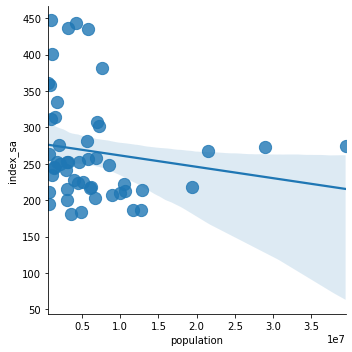

In [11]:
data = pd.concat([(미국인구['population']),(미국집값상승률['index_sa'])],axis=1)
sns.lmplot('population','index_sa',data=data,fit_reg=True,scatter_kws={"s":150})

In [24]:
미국데이터['면적당스타벅스']=스타벅스['value']/미국데이터['km2']
미국데이터['인구당스타벅스']=스타벅스['value']/미국데이터['population']
미국데이터['면적당맥도날드']=맥도날드["McDonald's"]/미국데이터['km2']
미국데이터['인구당맥도날드']=맥도날드["McDonald's"]/미국데이터['population']
미국데이터['면적당맥도날드'].sort_values()

Alaska            0.000018
Wyoming           0.000095
Montana           0.000109
North Dakota      0.000123
South Dakota      0.000148
Idaho             0.000234
New Mexico        0.000255
Nebraska          0.000357
Utah              0.000418
Nevada            0.000450
Oregon            0.000611
Colorado          0.000674
Kansas            0.000694
Arizona           0.000721
Maine             0.000726
Oklahoma          0.000872
Iowa              0.000906
Arkansas          0.000942
Minnesota         0.000984
Mississippi       0.001020
Vermont           0.001215
Texas             0.001233
West Virginia     0.001446
Washington        0.001458
Alabama           0.001601
Missouri          0.001679
Louisiana         0.002020
Wisconsin         0.002032
Kentucky          0.002161
South Carolina    0.002312
Georgia           0.002450
Tennessee         0.002669
New Hampshire     0.002674
California        0.002887
North Carolina    0.002970
Indiana           0.003513
Michigan          0.003722
V

C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: Runtim

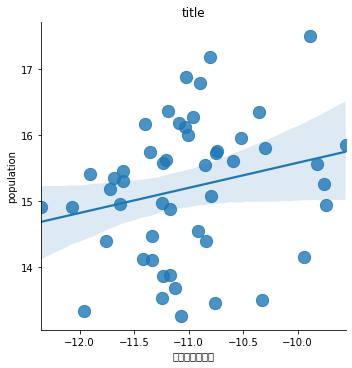

In [20]:
data = pd.concat([np.log(미국데이터['인구당스타벅스']),np.log(미국데이터['population'])],axis=1)
data.drop(data.index[8],inplace=True)
g=sns.lmplot('인구당스타벅스','population',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47589 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: Runtim

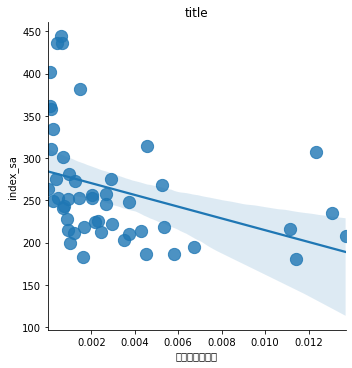

In [25]:
data = pd.concat([(미국데이터['면적당맥도날드']),(미국집값상승률['index_sa'])],axis=1)
data.drop(data.index[8],inplace=True)
g=sns.lmplot('면적당맥도날드','index_sa',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

In [15]:
미국데이터

,population,km2,index_sa,2018,2018-Q1,인구밀도,면적당스타벅스,인구당스타벅스
Alabama,4903185,131171,30.01,208752.7,197154.4,37.380099,1.099633,0.000007
Alaska,731545,1477953,30.18,44369.6,52871.3,0.494972,0.795229,0.000033
Arizona,7278717,294207,68.00,319226.3,311712.7,24.740122,3.617647,0.000034
Arkansas,3017825,134771,29.14,130397.5,116118.2,22.392243,0.446122,0.000004
California,39512223,403466,40.55,2514503.4,2680610.4,97.931977,49.420469,0.000051
Colorado,5758736,268431,71.77,335195.8,339705.9,21.453319,4.361154,0.000054
Connecticut,3565287,12542,29.57,267346.2,249589.4,284.267820,2.468718,0.000020
Delaware,705749,5047,28.51,51103.1,62349.7,139.835348,0.526131,0.000021
D.C,973764,158,76.05,56995.8,121744.9,6163.063291,0.802104,0.000063
Florida,21477737,138887,45.15,1082702.2,929250.0,154.641810,7.774086,0.000016


C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: Runtim

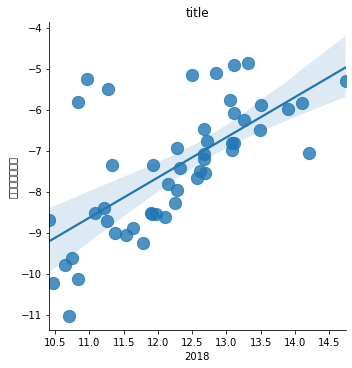

In [29]:
data = pd.concat([np.log(미국데이터['2018']),np.log(미국데이터['면적당스타벅스'])],axis=1)
data.drop(data.index[8],inplace=True)
g=sns.lmplot('2018','면적당스타벅스',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

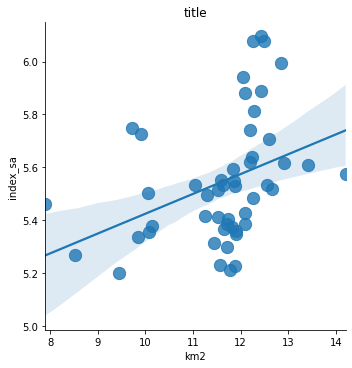

In [34]:
data = pd.concat([np.log(미국데이터['km2']),np.log(미국집값상승률['index_sa'])],axis=1)
data.drop(data.index[8],inplace=True)
g=sns.lmplot('km2','index_sa',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)